In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import random
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the train dataset
data1=pd.read_csv("Train_Beneficiarydata.csv",encoding='UTF-8')
data2=pd.read_csv("Train_Inpatientdata.csv",encoding='UTF-8')
data3=pd.read_csv("Train_Outpatientdata.csv",encoding='UTF-8')
data4=pd.read_csv("Train.csv",encoding='UTF-8')

data5=pd.read_csv("Test_Beneficiarydata.csv",encoding='UTF-8')
data6=pd.read_csv("Test_Inpatientdata.csv",encoding='UTF-8')
data7=pd.read_csv("Test_Outpatientdata.csv",encoding='UTF-8')
data8=pd.read_csv("Test.csv",encoding='UTF-8')

In [3]:
#duplicates in train

print("duplicates: ",data1.duplicated().sum())
print("duplicates: ",data2.duplicated().sum())
print("duplicates: ",data3.duplicated().sum())
print("duplicates: ",data4.duplicated().sum())

print("duplicates: ",data5.duplicated().sum())
print("duplicates: ",data6.duplicated().sum())
print("duplicates: ",data7.duplicated().sum())
print("duplicates: ",data8.duplicated().sum())

duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0
duplicates:  0


In [4]:
#shape of train
print("data1: ",data1.shape)
print("data2: ",data2.shape)
print("data3: ",data3.shape)
print("data4: ",data4.shape)

print("data5: ",data5.shape)
print("data6: ",data6.shape)
print("data7: ",data7.shape)
print("data8: ",data8.shape)

data1:  (138556, 25)
data2:  (40474, 30)
data3:  (517737, 27)
data4:  (5410, 2)
data5:  (63968, 25)
data6:  (9551, 30)
data7:  (125841, 27)
data8:  (1353, 1)


In [5]:
data1.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
data2.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
data3.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [8]:
data4.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [9]:
data5.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [10]:
data6.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data7.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [12]:
data8.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [13]:
data1.info()
data2.info()
data3.info()
data4.info()

data5.info()
data6.info()
data7.info()
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [14]:
print(data1.isnull().sum())
print("******************************************")
print(data2.isnull().sum())
print("******************************************")
print(data3.isnull().sum())
print("******************************************")
print(data4.isnull().sum())
print("******************************************")
print("******************************************")
print(data5.isnull().sum())
print("******************************************")
print(data6.isnull().sum())
print("******************************************")
print(data7.isnull().sum())
print("******************************************")
print(data8.isnull().sum())

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [15]:
data1['DOB'] = pd.to_datetime(data1['DOB'] , format = '%Y-%m-%d')
data1['DOD'] = pd.to_datetime(data1['DOD'],format = '%Y-%m-%d',errors='ignore')
data1['Age'] = round(((data1['DOD'] - data1['DOB']).dt.days)/365)

data5['DOB'] = pd.to_datetime(data5['DOB'] , format = '%Y-%m-%d')
data5['DOD'] = pd.to_datetime(data5['DOD'],format = '%Y-%m-%d',errors='ignore')
data5['Age'] = round(((data5['DOD'] - data5['DOB']).dt.days)/365)

data1.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - data1['DOB']).dt.days)/365),inplace=True)
data5.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - data5['DOB']).dt.days)/365),inplace=True)

In [16]:
data2['AdmissionDt'] = pd.to_datetime(data2['AdmissionDt'] , format = '%Y-%m-%d')
data2['DischargeDt'] = pd.to_datetime(data2['DischargeDt'],format = '%Y-%m-%d')
data2['AdmitForDays'] = ((data2['DischargeDt'] - data2['AdmissionDt']).dt.days)+1

data2['ClaimStartDt'] = pd.to_datetime(data2['ClaimStartDt'] , format = '%Y-%m-%d')
data2['ClaimEndDt'] = pd.to_datetime(data2['ClaimEndDt'],format = '%Y-%m-%d')
data2['ClaimDays'] = ((data2['ClaimEndDt'] - data2['ClaimStartDt']).dt.days)+1

data3['ClaimStartDt'] = pd.to_datetime(data3['ClaimStartDt'] , format = '%Y-%m-%d')
data3['ClaimEndDt'] = pd.to_datetime(data3['ClaimEndDt'],format = '%Y-%m-%d')
data3['ClaimDays'] = ((data3['ClaimEndDt'] - data3['ClaimStartDt']).dt.days)+1

#test data
data6['AdmissionDt'] = pd.to_datetime(data6['AdmissionDt'] , format = '%Y-%m-%d')
data6['DischargeDt'] = pd.to_datetime(data6['DischargeDt'],format = '%Y-%m-%d')
data6['AdmitForDays'] = ((data6['DischargeDt'] - data6['AdmissionDt']).dt.days)+1

data6['ClaimStartDt'] = pd.to_datetime(data6['ClaimStartDt'] , format = '%Y-%m-%d')
data6['ClaimEndDt'] = pd.to_datetime(data6['ClaimEndDt'],format = '%Y-%m-%d')
data6['ClaimDays'] = ((data6['ClaimEndDt'] - data6['ClaimStartDt']).dt.days)+1

data7['ClaimStartDt'] = pd.to_datetime(data7['ClaimStartDt'] , format = '%Y-%m-%d')
data7['ClaimEndDt'] = pd.to_datetime(data7['ClaimEndDt'],format = '%Y-%m-%d')
data7['ClaimDays'] = ((data7['ClaimEndDt'] - data7['ClaimStartDt']).dt.days)+1

In [17]:
data1.drop('DOD', axis=1, inplace=True)
data1.drop('DOB', axis=1, inplace=True)

data2.drop('DischargeDt', axis=1, inplace=True)
data2.drop('AdmissionDt', axis=1, inplace=True)

data2.drop('ClaimStartDt', axis=1, inplace=True)
data2.drop('ClaimEndDt', axis=1, inplace=True)

data3.drop('ClaimStartDt', axis=1, inplace=True)
data3.drop('ClaimEndDt', axis=1, inplace=True)

#test data
data5.drop('DOD', axis=1, inplace=True)
data5.drop('DOB', axis=1, inplace=True)

data6.drop('DischargeDt', axis=1, inplace=True)
data6.drop('AdmissionDt', axis=1, inplace=True)

data6.drop('ClaimStartDt', axis=1, inplace=True)
data6.drop('ClaimEndDt', axis=1, inplace=True)

data7.drop('ClaimStartDt', axis=1, inplace=True)
data7.drop('ClaimEndDt', axis=1, inplace=True)

In [18]:
print("**************TRAIN DATA 1 ****************")
print((data1.isna().sum()/len(data1))*100)
print("**************TEST DATA 5 ****************")
print((data5.isna().sum()/len(data1))*100)

**************TRAIN DATA 1 ****************
BeneID                             0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator              0.0
State                              0.0
County                             0.0
NoOfMonths_PartACov                0.0
NoOfMonths_PartBCov                0.0
ChronicCond_Alzheimer              0.0
ChronicCond_Heartfailure           0.0
ChronicCond_KidneyDisease          0.0
ChronicCond_Cancer                 0.0
ChronicCond_ObstrPulmonary         0.0
ChronicCond_Depression             0.0
ChronicCond_Diabetes               0.0
ChronicCond_IschemicHeart          0.0
ChronicCond_Osteoporasis           0.0
ChronicCond_rheumatoidarthritis    0.0
ChronicCond_stroke                 0.0
IPAnnualReimbursementAmt           0.0
IPAnnualDeductibleAmt              0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
Age                                0.0
dtype: float64
*****

In [19]:
print("**************TRAIN DATA 2 ****************")
print((data2.isna().sum()/len(data2))*100)
print("**************TEST DATA 6 ****************")
print((data6.isna().sum()/len(data6))*100)

**************TRAIN DATA 2 ****************
BeneID                      0.000000
ClaimID                     0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
ClmProcedureCode_4         99.713396
ClmProcedureCode_5         99.977764
ClmProcedureCode_6        100.0

In [20]:
x1=(data2.isna().sum()/len(data2))*100
col_Todrop_data2 = x1[x1> 50].index.tolist()

In [21]:
print("**************TRAIN DATA 3 ****************")
print((data3.isna().sum()/len(data3))*100)
print("**************TEST DATA 7 ****************")
print((data7.isna().sum()/len(data7))*100)

**************TRAIN DATA 3 ****************
BeneID                      0.000000
ClaimID                     0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
ClaimDays                   0.0

In [22]:
x2=(data3.isna().sum()/len(data2))*100
col_Todrop_data3=x2[x2> 50].index.tolist()

In [23]:
for i in col_Todrop_data2:
    data2.drop(i,axis=1,inplace=True)
    data6.drop(i,axis=1,inplace=True)
for i in col_Todrop_data3:
    data3.drop(i,axis=1,inplace=True)
    data7.drop(i,axis=1,inplace=True)

In [24]:
#train inpatient data
merged_data2=pd.merge(data2, data1, on='BeneID', how='left')
fdata1=pd.DataFrame(merged_data2)

#test inpatient data
merged_data2=pd.merge(data6, data5, on='BeneID', how='left')
fdata1_test=pd.DataFrame(merged_data2)

#train outpatient data
merged_data2=pd.merge(data3, data1, on='BeneID', how='left')
fdata2=pd.DataFrame(merged_data2)

#test outpatient data
merged_data2=pd.merge(data7, data5, on='BeneID', how='left')
fdata2_test=pd.DataFrame(merged_data2)

In [25]:
print("fdata1.shape: ",fdata1.shape)
print("fdata1_test.shape: ",fdata1_test.shape)

print("fdata2.shape: ",fdata2.shape)
print("fdata2_test.shape: ",fdata2_test.shape)

fdata1.shape:  (40474, 44)
fdata1_test.shape:  (9551, 44)
fdata2.shape:  (517737, 31)
fdata2_test.shape:  (125841, 31)


In [26]:
#merging the target data inpatient
merged_data2=pd.merge(fdata1,data4,on='Provider',how='left')
fdata1=pd.DataFrame(merged_data2)

merged_data2=pd.merge(fdata1_test,data8,on='Provider',how='left')
fdata1_test=pd.DataFrame(merged_data2)

#merging the target data in out patient
merged_data2=pd.merge(fdata2,data4,on='Provider',how='left')
fdata2=pd.DataFrame(merged_data2)

merged_data2=pd.merge(fdata2_test,data8,on='Provider',how='left')
fdata2_test=pd.DataFrame(merged_data2)

In [27]:
fdata1.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,NaN,7866,1068.0,201,1970,...,1,2,1,1,36000,3204,60,70,67.0,Yes
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,6186,1068.0,750,6186,...,1,2,1,1,36000,3204,60,70,67.0,No
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,NaN,29590,1068.0,883,29623,...,1,2,1,1,36000,3204,60,70,67.0,No
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,431,1068.0,067,43491,...,2,2,1,1,5000,1068,250,320,96.0,No
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,78321,1068.0,975,042,...,1,2,2,2,21260,2136,120,100,72.0,No


In [28]:
fdata1_test.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11014,CLM67387,PRV57070,9000,PHY317786,PHY427017,5789,1068.0,332,5780,...,2,1,2,2,2,21260,2136,120,100,72.0
1,BENE11017,CLM31237,PRV54750,14000,PHY314656,PHY426644,5939,1068.0,661,1889,...,1,1,2,1,1,22000,2136,1400,840,70.0
2,BENE11026,CLM78930,PRV53758,2000,PHY349495,NaN,4019,1068.0,241,4010,...,2,1,2,2,2,2000,1068,0,0,72.0
3,BENE11031,CLM56810,PRV55825,16000,PHY429538,PHY371893,8208,1068.0,564,8208,...,2,1,1,2,2,23650,2136,40,0,65.0
4,BENE11085,CLM34625,PRV52338,19000,PHY397161,NaN,4279,1068.0,880,29654,...,1,1,1,2,2,19000,1068,1670,520,47.0


In [29]:
print(fdata1['PotentialFraud'].isnull().sum())
print(fdata1.duplicated().sum())
print(fdata2['PotentialFraud'].isnull().sum())
print(fdata1.duplicated().sum())

0
0
0
0


In [30]:
fdata2.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DeductibleAmtPaid,ClaimDays,Gender,Race,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,BENE11002,CLM624349,PRV56011,30,PHY326117,78943,0,1,2,1,...,2,2,2,2,0,0,30,50,73.0,Yes
1,BENE11003,CLM189947,PRV57610,80,PHY362868,6115,0,1,1,1,...,1,2,2,2,0,0,90,40,73.0,No
2,BENE11003,CLM438021,PRV57595,10,PHY328821,2723,0,1,1,1,...,1,2,2,2,0,0,90,40,73.0,No
3,BENE11004,CLM121801,PRV56011,40,PHY334319,71988,0,1,1,1,...,1,1,1,2,0,0,1810,760,87.0,Yes
4,BENE11004,CLM150998,PRV56011,200,PHY403831,82382,0,1,1,1,...,1,1,1,2,0,0,1810,760,87.0,Yes


In [31]:
fdata2_test.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,DeductibleAmtPaid,ClaimDays,Gender,Race,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM392397,PRV55962,30,PHY347633,V5832,0,1,1,1,...,1,1,2,1,1,36000,3204,60,70,67.0
1,BENE11001,CLM430760,PRV56112,30,PHY381777,9594,0,1,1,1,...,1,1,2,1,1,36000,3204,60,70,67.0
2,BENE11007,CLM233081,PRV56979,200,PHY425311,7248,0,1,1,2,...,1,2,1,1,2,0,0,1490,160,69.0
3,BENE11007,CLM496381,PRV56573,10,PHY393253,58889,0,1,1,2,...,1,2,1,1,2,0,0,1490,160,69.0
4,BENE11007,CLM521391,PRV56573,10,PHY417685,V666,0,1,1,2,...,1,2,1,1,2,0,0,1490,160,69.0


In [32]:
print(fdata1.shape)
print("--------------------------------------------------")
fdata1.isna().sum()

(40474, 45)
--------------------------------------------------


BeneID                                 0
ClaimID                                0
Provider                               0
InscClaimAmtReimbursed                 0
AttendingPhysician                   112
OperatingPhysician                 16644
ClmAdmitDiagnosisCode                  0
DeductibleAmtPaid                    899
DiagnosisGroupCode                     0
ClmDiagnosisCode_1                     0
ClmDiagnosisCode_2                   226
ClmDiagnosisCode_3                   676
ClmDiagnosisCode_4                  1534
ClmDiagnosisCode_5                  2894
ClmDiagnosisCode_6                  4838
ClmDiagnosisCode_7                  7258
ClmDiagnosisCode_8                  9942
ClmDiagnosisCode_9                 13497
ClmProcedureCode_1                 17326
AdmitForDays                           0
ClaimDays                              0
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State           

In [33]:
arrC=['AttendingPhysician','OperatingPhysician','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4'
                           ,'ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9']
arrN=['DeductibleAmtPaid','ClmProcedureCode_1']  #arrc: all catergorical values arrN: all numerical values

#imputation inpatient
knn_imputer=KNNImputer(n_neighbors=5)

chunk_size=1000  #will impute 1000 at a time since dataset is large it takes time

for i in range(0,len(fdata1),chunk_size):
    chunk_data=fdata1.iloc[i:i+chunk_size]
    imputed_chunk=knn_imputer.fit_transform(chunk_data[arrN])

    fdata1.loc[i:i+chunk_size-1,arrN]=imputed_chunk

for i in arrC:
    categories=fdata1[i].dropna().unique()
    fdata1[i].fillna(random.choice(categories),inplace=True)

In [34]:
print(fdata2.shape)
print('--------------------------')
fdata2.isna().sum()

(517737, 32)
--------------------------


BeneID                                 0
ClaimID                                0
Provider                               0
InscClaimAmtReimbursed                 0
AttendingPhysician                  1396
ClmDiagnosisCode_1                 10453
DeductibleAmtPaid                      0
ClaimDays                              0
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheu

In [35]:
#imputation outpatient
arrC=['AttendingPhysician','ClmDiagnosisCode_1']
for i in arrC:
    categories = fdata2[i].dropna().unique()
    fdata2[i].fillna(random.choice(categories), inplace=True)

In [36]:
#label encoding for Inpatient data
arr1=fdata1.select_dtypes(include=['object']).columns.tolist()
arr1.remove('PotentialFraud')
for i in arr1:
    sampler1=LabelEncoder()
    sampler2=LabelEncoder()
    fdata1[i]=sampler1.fit_transform(fdata1[i])
    fdata1_test[i]=sampler2.fit_transform(fdata1_test[i])

fdata1['PotentialFraud']=fdata1['PotentialFraud'].map({'Yes':1,'No':0})

#label encoding for outpatient data
arr2=fdata2.select_dtypes(include=['object']).columns.tolist()
arr2.remove('PotentialFraud')
for i in arr2:
    sampler3=LabelEncoder()
    sampler4=LabelEncoder()
    fdata2[i]=sampler3.fit_transform(fdata2[i])
    fdata2_test[i]=sampler4.fit_transform(fdata2_test[i])

fdata2['PotentialFraud'] = fdata2['PotentialFraud'].map({'Yes':1,'No':0})

In [37]:
fdata1.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,2141,12665,1543,26000,7483,1521,1464,1068.0,154,221,...,1,2,1,1,36000,3204,60,70,67.0,1
1,2141,28399,1540,5000,657,484,1127,1068.0,580,1396,...,1,2,1,1,36000,3204,60,70,67.0,0
2,2141,30241,1585,5000,5789,1521,400,1068.0,665,531,...,1,2,1,1,36000,3204,60,70,67.0,0
3,2163,6040,540,5000,5542,5530,679,1068.0,52,886,...,2,2,1,1,5000,1068,250,320,96.0,0
4,2173,26500,1753,10000,6412,5896,1432,1068.0,721,41,...,1,2,2,2,21260,2136,120,100,72.0,0


<Axes: >

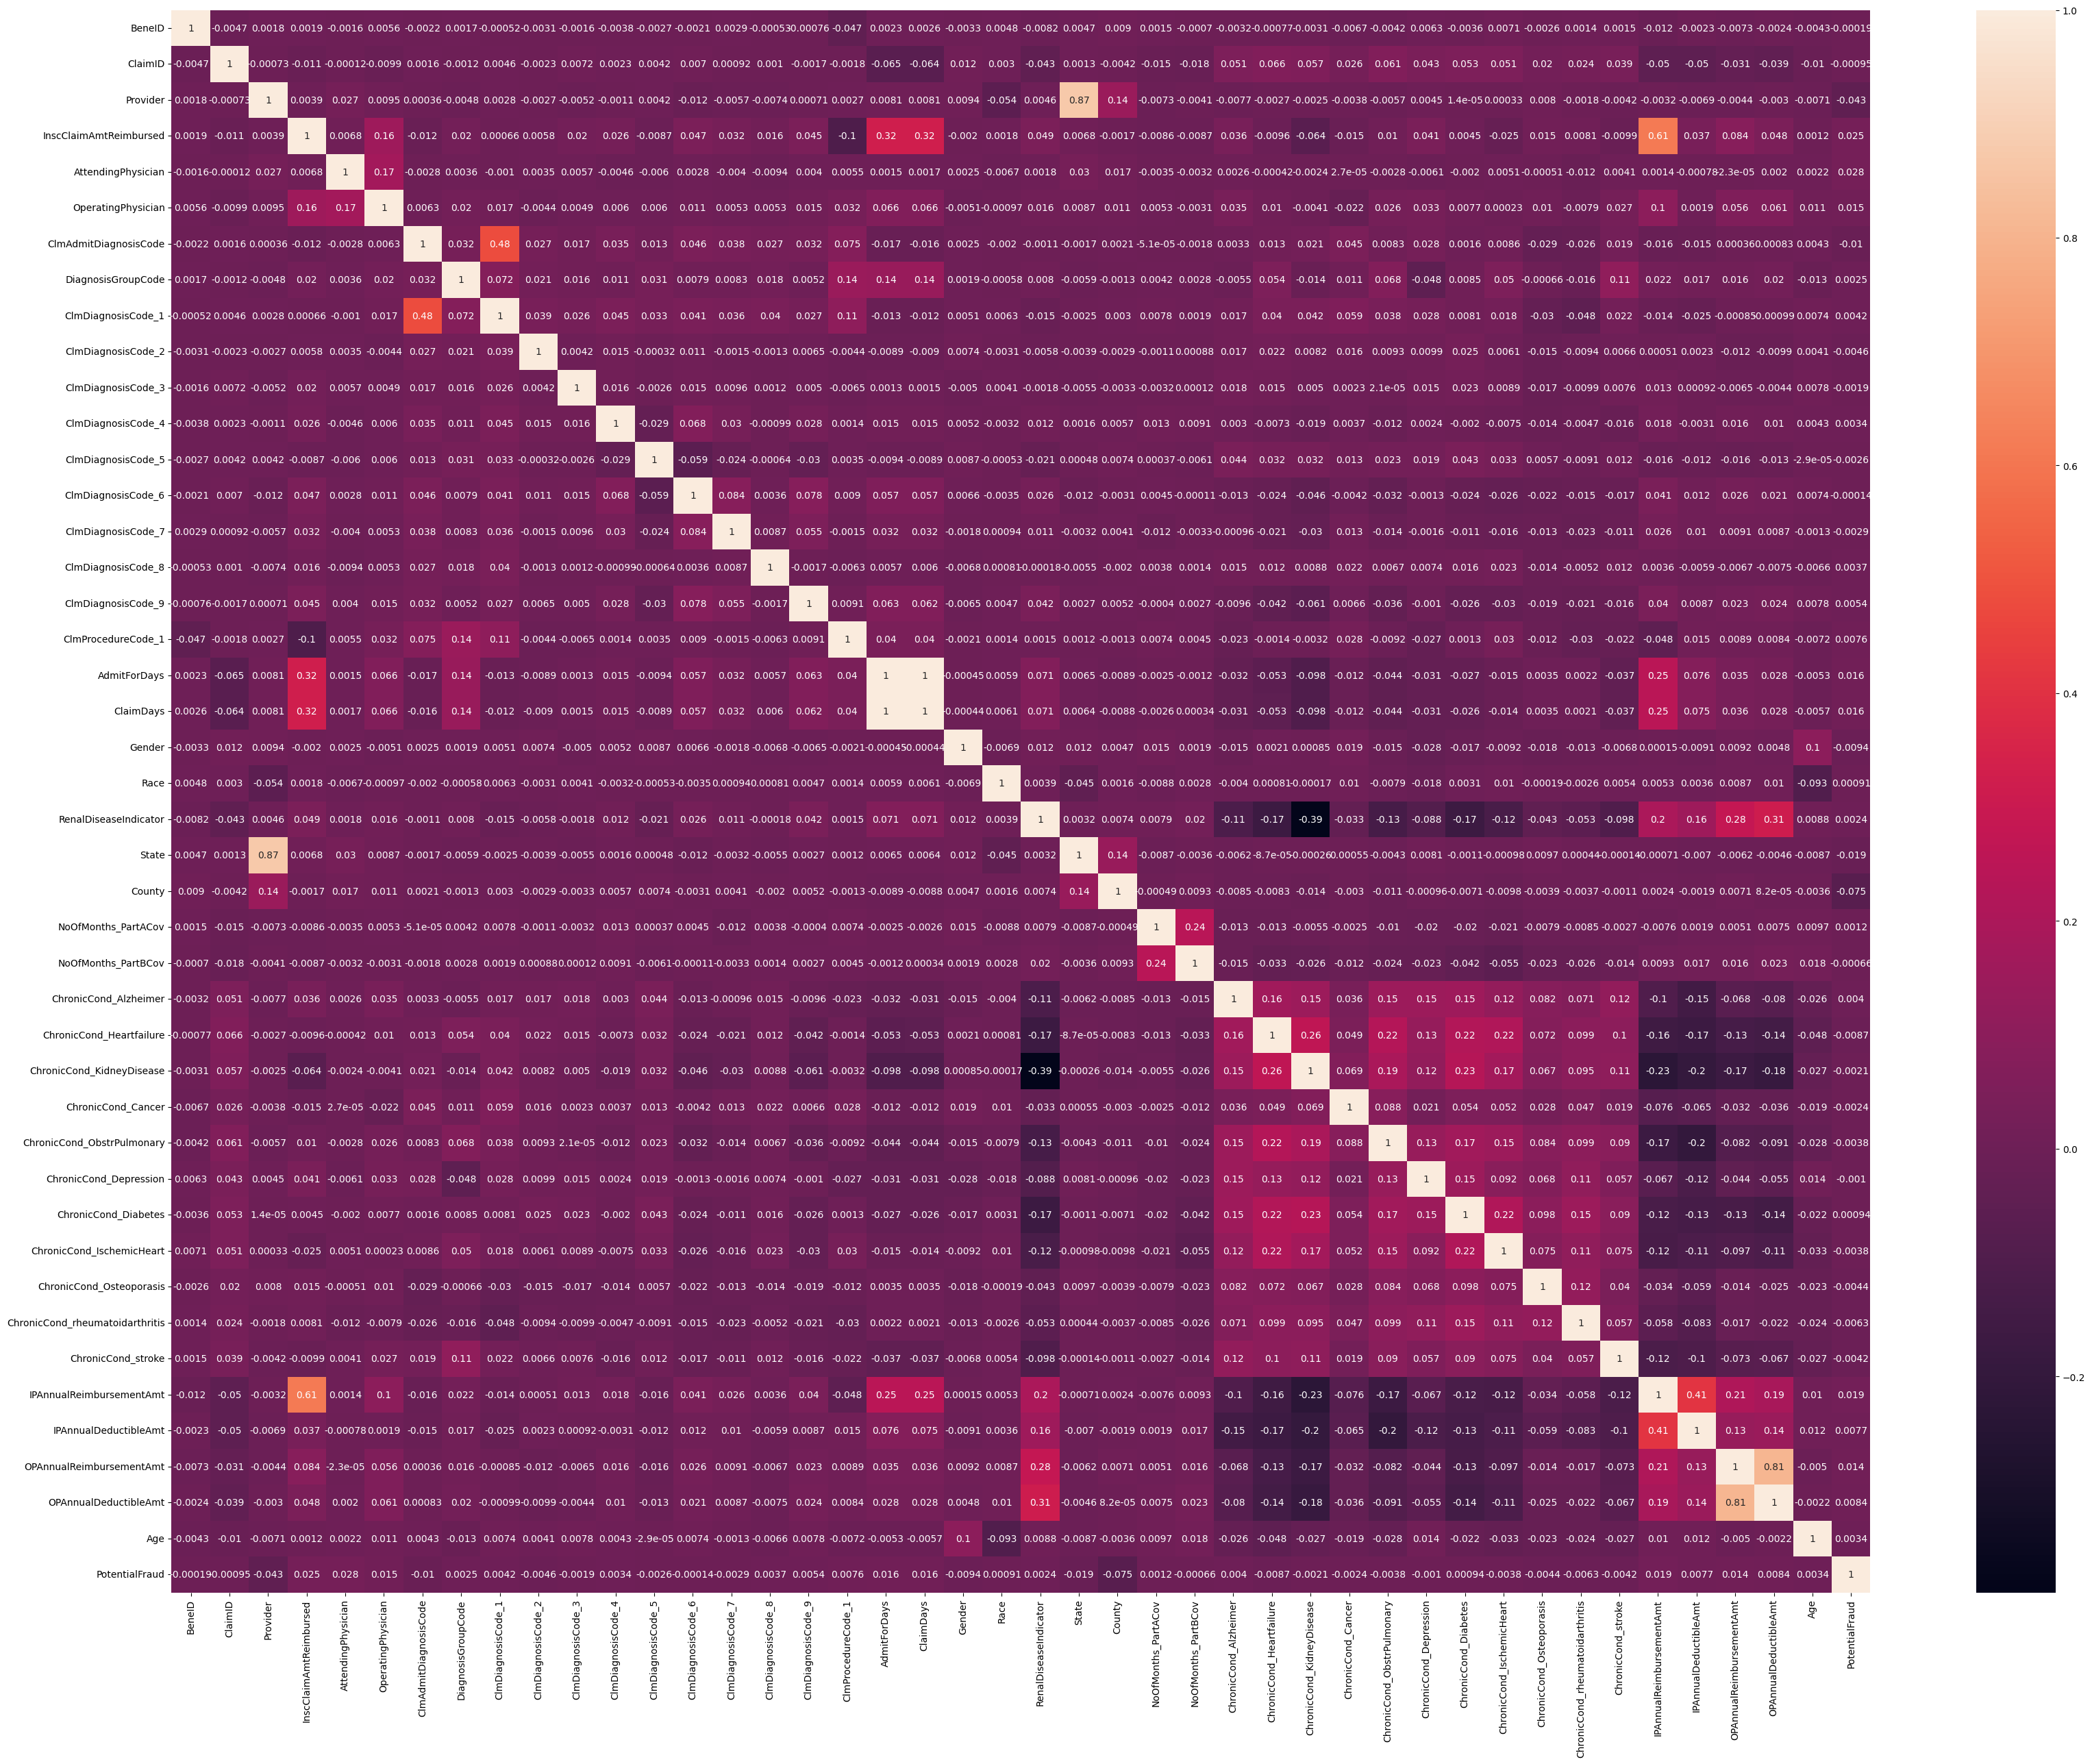

In [38]:
fdata1.drop('DeductibleAmtPaid',axis=1,inplace=True)
plt.figure(figsize=(40,30))
sns.heatmap(fdata1.corr(),annot=True)

<Axes: >

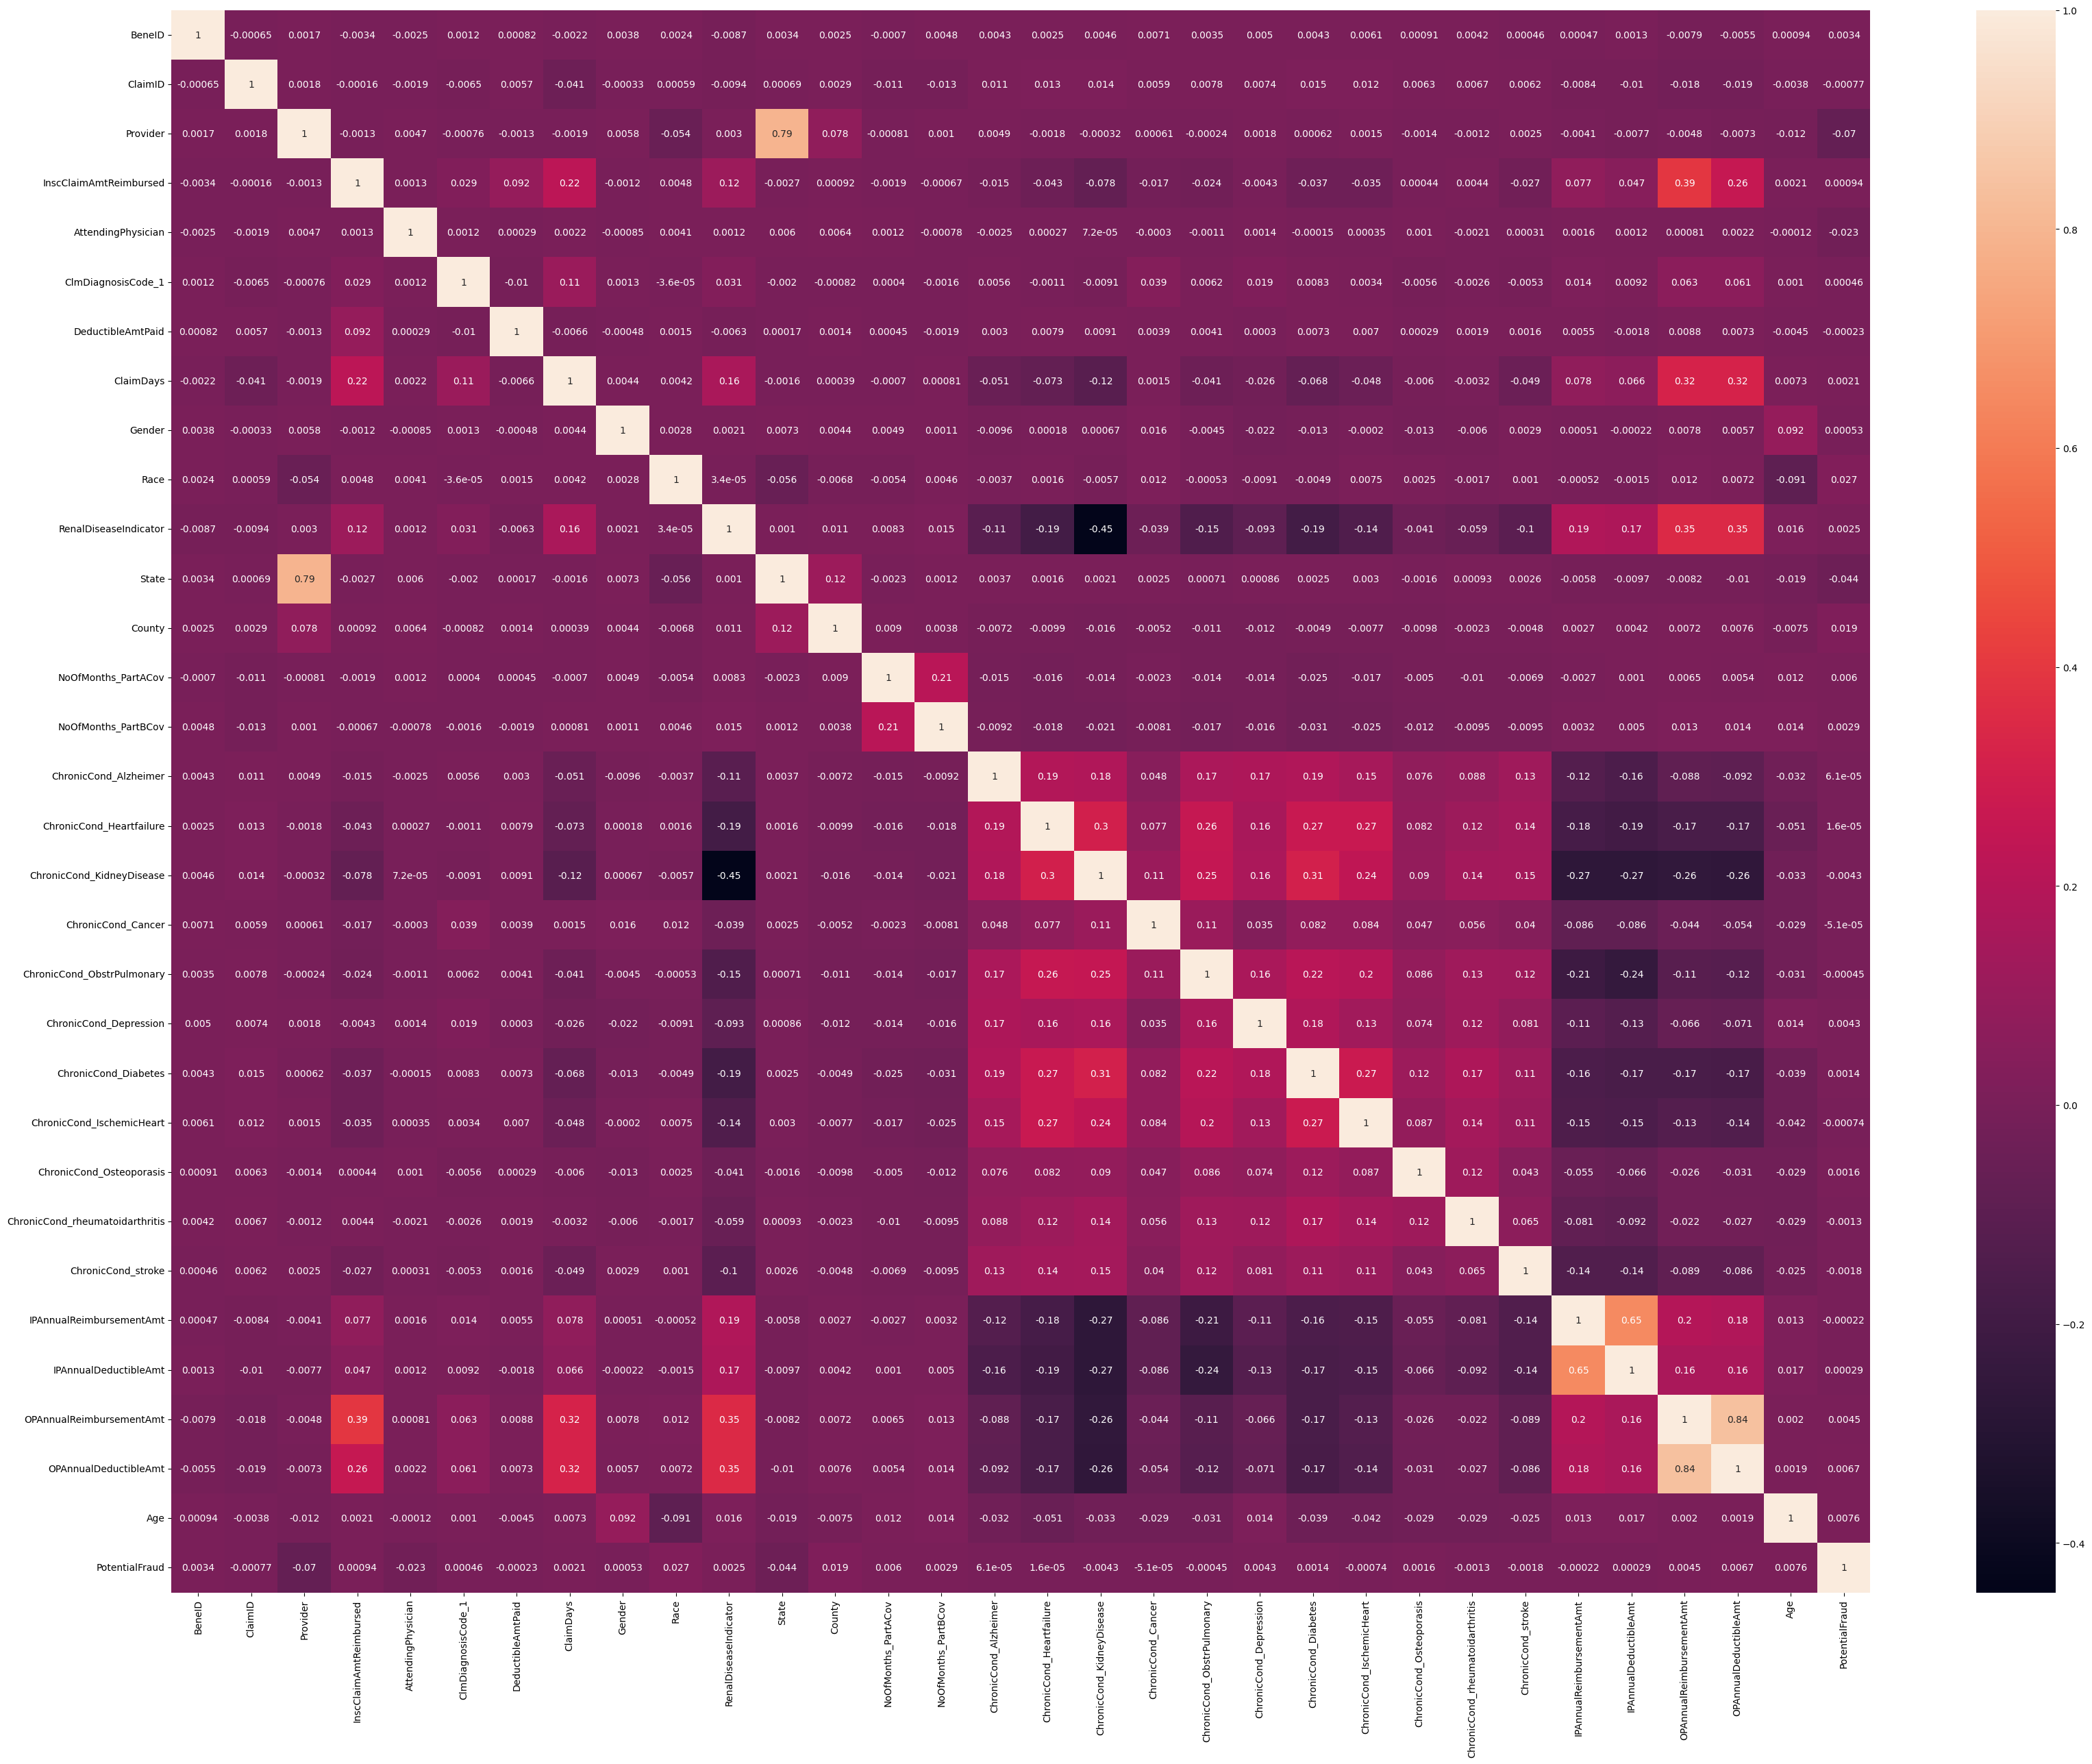

In [39]:
plt.figure(figsize=(40,30))
sns.heatmap(fdata2.corr(),annot=True)

Now we finally have a usable dataset fdata1 and fdata2
Where fdata1 captures inpatient scenario and fdata2 captures outpatient scenario



In [40]:
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
print("Inpatient: ",fdata1.shape)
print("Outpatient ",fdata2.shape)

Inpatient:  (40474, 44)
Outpatient  (517737, 32)


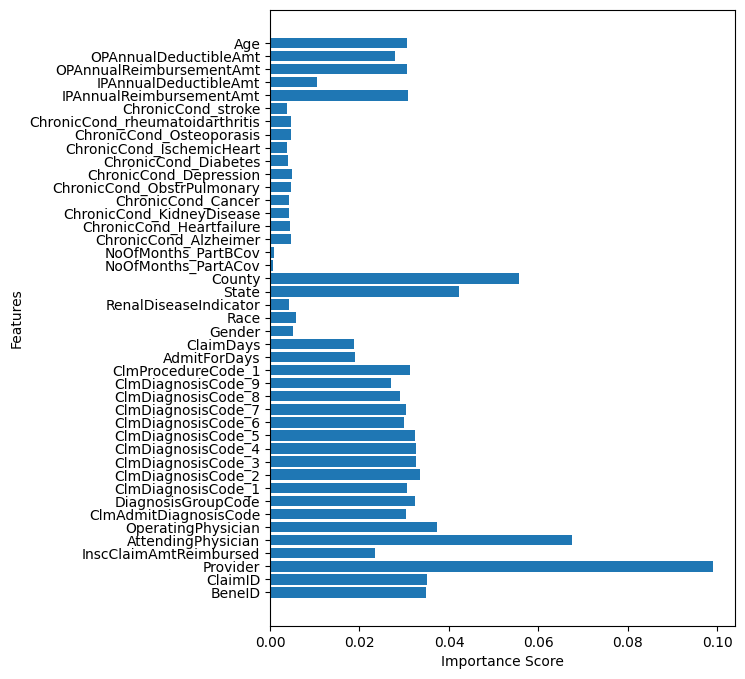

In [42]:
#manual feature selection
#inpatient dataset
X1=fdata1.iloc[:,:-1]
y1=fdata1.iloc[:,-1]
rf1 = RandomForestClassifier(n_estimators=60,random_state=42)
rf1.fit(X1,y1)
#ploting the importance scorces
arr=fdata1.columns.tolist()
arr.remove('PotentialFraud')
plt.figure(figsize=(6,8))
feature_names = list(arr)
plt.barh(feature_names, rf1.feature_importances_)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

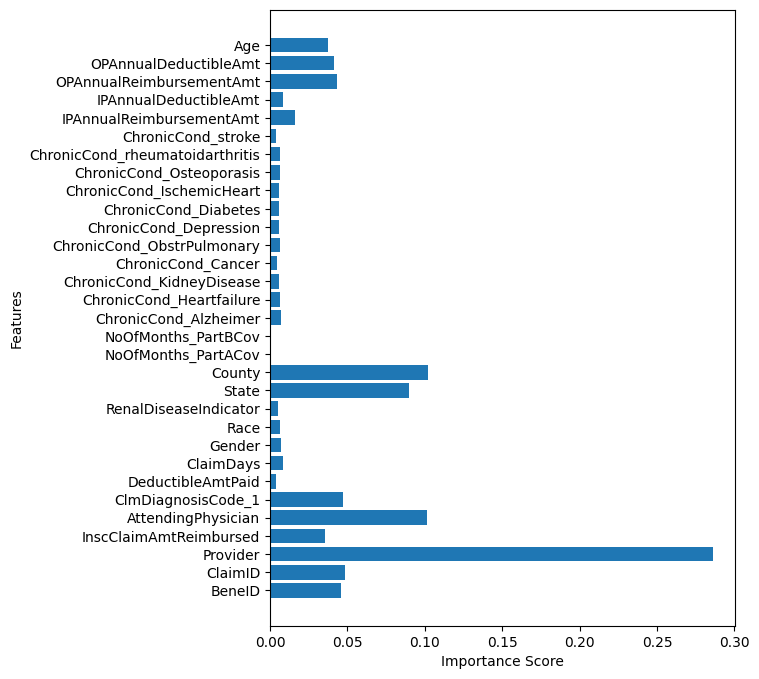

In [43]:
#outpatient dataset
X2=fdata2.iloc[:,:-1]
y2=fdata2.iloc[:,-1]
rf2 = RandomForestClassifier(n_estimators=60,random_state=42,)
rf2.fit(X2,y2)
#ploting the importance scores
arr=fdata2.columns.tolist()
arr.remove('PotentialFraud')
plt.figure(figsize=(6,8))
feature_names = list(arr)
plt.barh(feature_names, rf2.feature_importances_)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [44]:
threshold = 0.03 #select the threshold to select the most important features
selected_columns = np.where(rf1.feature_importances_ > threshold)[0]
selected_features_1 = fdata1.columns[selected_columns]
print("Selected features:",selected_features_1)

Selected features: Index(['BeneID', 'ClaimID', 'Provider', 'AttendingPhysician',
       'OperatingPhysician', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_7',
       'ClmProcedureCode_1', 'State', 'County', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'Age'],
      dtype='object')


In [45]:
threshold = 0.02 #select the threshold to select the most important features
selected_columns = np.where(rf2.feature_importances_ > threshold)[0]
selected_features_2 = fdata2.columns[selected_columns]
print("Selected features:",selected_features_2)

Selected features: Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'ClmDiagnosisCode_1', 'State', 'County',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age'],
      dtype='object')


In [46]:
xf1=fdata1.loc[:,selected_features_1]
y1=pd.DataFrame(y1,columns=['PotentialFraud'])
fdata1_test=fdata1_test.loc[:,selected_features_1]
fdata1=pd.concat([xf1,y1],axis=1)

In [47]:
fdata1.shape

(40474, 20)

In [48]:
fdata1.head()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_7,ClmProcedureCode_1,State,County,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Age,PotentialFraud
0,2141,12665,1543,7483,1521,1464,154,221,722,1255,1703,320,301,3351.0,39,230,36000,60,67.0,1
1,2141,28399,1540,657,484,1127,580,1396,412,1165,35,1409,603,7092.0,39,230,36000,60,67.0,0
2,2141,30241,1585,5789,1521,400,665,531,464,1467,615,2204,603,3351.0,39,230,36000,60,67.0,0
3,2163,6040,540,5542,5530,679,52,886,307,1697,554,2146,259,331.0,1,360,5000,250,96.0,0
4,2173,26500,1753,6412,5896,1432,721,41,491,606,1253,800,1002,3893.0,45,780,21260,120,72.0,0


In [49]:
fdata1_test.head()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_7,ClmProcedureCode_1,State,County,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Age
0,546,6898,479,142,1772,618,251,790,681,608,1261,417,708,4443.0,45,780,21260,120,72.0
1,551,45,294,81,1768,633,505,102,429,772,652,566,510,5551.0,31,270,22000,1400,70.0
2,555,9132,235,817,1870,326,184,420,1015,776,416,1210,901,NaN,22,20,2000,0,72.0
3,556,4853,389,2544,955,938,438,1107,448,1111,741,418,418,8152.0,38,200,23650,40,65.0
4,587,660,130,1853,1870,377,649,306,1275,1008,283,1220,1226,NaN,11,470,19000,1670,47.0


<Axes: >

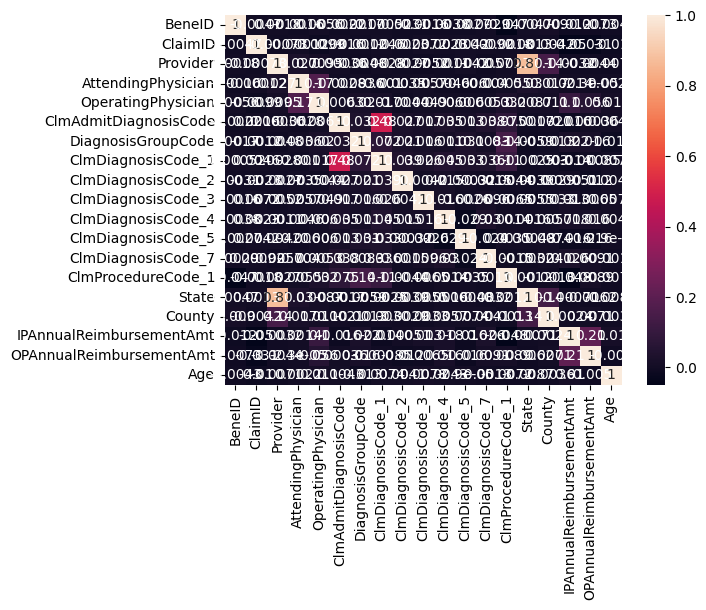

In [50]:
sns.heatmap(xf1.corr(),annot=True)

In [51]:
fdata1_test.shape

(9551, 19)

In [52]:
#creating new dataframe with the most important features
xf2=fdata2.loc[:,selected_features_2]
y2=pd.DataFrame(y2,columns=['PotentialFraud'])
fdata2_test=fdata2_test.loc[:,selected_features_2]
fdata2=pd.concat([xf2,y2],axis=1)

In [53]:
fdata2.shape

(517737, 12)

In [54]:
fdata2.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,State,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,PotentialFraud
0,9080,413702,3726,30,9159,7242,39,280,30,50,73.0,1
1,9090,64215,4894,80,31170,5309,52,590,90,40,73.0,0
2,9090,263736,4883,10,10806,1853,52,590,90,40,73.0,0
3,9099,9430,3726,40,14065,6350,39,270,1810,760,87.0,1
4,9099,32966,3726,200,55907,7912,39,270,1810,760,87.0,1


In [55]:
fdata2_test.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,ClmDiagnosisCode_1,State,County,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,4003,55276,919,30,5812,7937,39,230,60,70,67.0
1,4003,62812,953,30,11291,7093,39,230,60,70,67.0
2,4020,24118,1125,200,18233,5281,45,610,1490,160,69.0
3,4020,75697,1038,10,13108,4181,45,610,1490,160,69.0
4,4020,80644,1038,10,16992,8051,45,610,1490,160,69.0


In [56]:
fdata2_test.shape

(125841, 11)

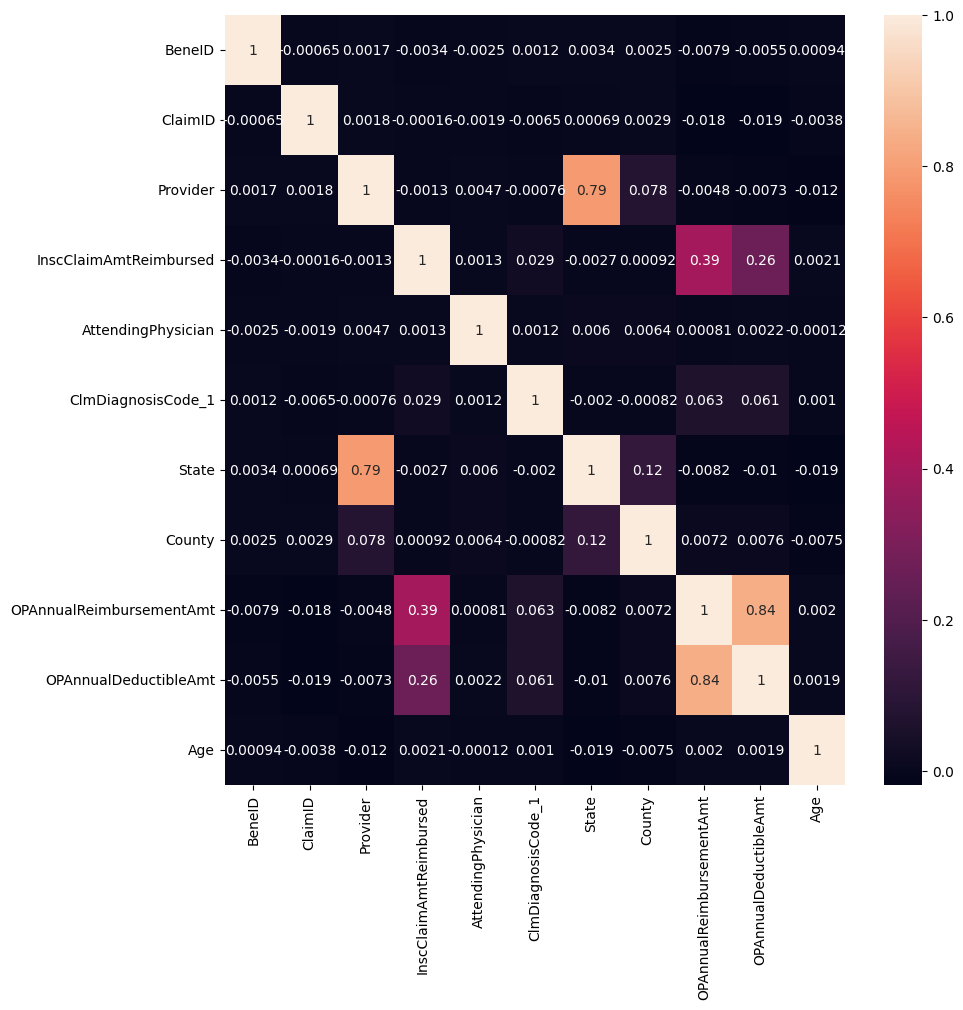

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(xf2.corr(),annot=True)
plt.show()